# Introduction to Scikit-Learn (sklearn)

This notebook illustrates useful functions from sklearn

Content:

0. End-to-end
1. Prepare the data
2. Choose the right estimator/model/algorithm for our problem
3. Fit the model to the data and use it to make predictions
4. Evaluate the model
5. Improve the mode
6. Save and load a trained modal
7. Put it all together

# 0. End-to-end Scikit-Learn workflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# features matrix
X = heart_disease.drop("target", axis=1)
# labels
y = heart_disease["target"]

NameError: name 'x' is not defined

In [9]:
X.shape, y.shape

((303, 13), (303,))

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [12]:
# Choose the model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [13]:
# Check out the hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
# Fit the model to the data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Use the model to make a prediction
y_predictions = clf.predict(X_test)
y_predictions

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [16]:
# type(y_test), type(y_predictions)
# pd.DataFrame({"Test": y_test, "Predictions": y_predictions}).sort_index()

In [17]:
# Evaluate the model
# 1. On the training set
clf.score(X_train, y_train)


1.0

In [18]:
# 2. On the testing set
clf.score(X_test, y_test)

0.8360655737704918

In [19]:
# Another method to evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85        33
           1       0.85      0.79      0.81        28

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [20]:
conf_mat = confusion_matrix(y_test, y_predictions)
conf_mat
#                   Predicted Class
#                ---------------------
#               |   True Positive (TP)   |   False Negative (FN)   |
# Actual Class  |-----------------------|------------------------|
#               |   False Positive (FP)  |   True Negative (TN)    |
#                ---------------------


array([[29,  4],
       [ 6, 22]])

In [21]:
accuracy_score(y_test, y_predictions)

0.8360655737704918

In [22]:
# Experiment to improve
# trying different numbers of estimators (trees) - no cross-validation
np.random.seed(42)
for i in range(1, 111):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)
    print(f"Trying model with {i} estimators...")
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%", end="\n\n")

Trying model with 1 estimators...
Model accuracy on test set: 73.77%

Trying model with 2 estimators...
Model accuracy on test set: 77.05%

Trying model with 3 estimators...
Model accuracy on test set: 88.52%

Trying model with 4 estimators...
Model accuracy on test set: 77.05%

Trying model with 5 estimators...
Model accuracy on test set: 72.13%

Trying model with 6 estimators...
Model accuracy on test set: 83.61%

Trying model with 7 estimators...
Model accuracy on test set: 75.41%

Trying model with 8 estimators...
Model accuracy on test set: 81.97%

Trying model with 9 estimators...
Model accuracy on test set: 80.33%

Trying model with 10 estimators...
Model accuracy on test set: 78.69%

Trying model with 11 estimators...
Model accuracy on test set: 81.97%

Trying model with 12 estimators...
Model accuracy on test set: 80.33%

Trying model with 13 estimators...
Model accuracy on test set: 81.97%

Trying model with 14 estimators...
Model accuracy on test set: 85.25%

Trying model wi

In [23]:
# Save the model

import pickle

pickle.dump(model, open("models/random_forest_model_1.pkl", "wb"))

In [24]:
# Load the model

loaded_model = pickle.load(open("models/random_forest_model_1.pkl", "rb"))

In [25]:
loaded_model.score(X_test, y_test)

0.8524590163934426

# 1. Prepare the data

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values a.k.a `feature encoding`

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [28]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1 Make sure it is all numerical

In [30]:
car_sales = pd.read_csv("data/car-sales-extended.csv")

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = car_sales.drop(["Price"], axis=1)
y = car_sales["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
mode.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [34]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [35]:
(len(car_sales["Make"].value_counts()),
 len(car_sales["Doors"].value_counts()),
 len(car_sales["Colour"].value_counts()) )

(4, 3, 5)

In [36]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

In [37]:
pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [38]:
print(sklearn.__version__)

NameError: name 'sklearn' is not defined

## 1.2 Missing values

1. Imputation (fill in missing values)
2. Drop

In [39]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [41]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Convert data to numbers
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                    one_hot,
                                    categorical_features)],
                                  remainder="passthrough")
X = transformer.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [44]:
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Option 1: Fill missing data with Pandas

In [45]:
car_sales_missing["Make"].fillna("Missing", inplace=True)
car_sales_missing["Colour"].fillna("Missing", inplace=True)
odometer_mean = car_sales_missing["Odometer (KM)"].mean()
car_sales_missing["Odometer (KM)"].fillna(odometer_mean,
                                          inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [46]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [47]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [48]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                    one_hot,
                                    categorical_features)],
                                  remainder="passthrough")
X = transformer.fit_transform(X)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model.fit(X_train, y_train);
model.score(X_test, y_test)

0.22233003292603104

## Option 2: Fill missing data with scikit-learn

In [49]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [51]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
X = car_sales_missing.drop(["Price"], axis=1)
y = car_sales_missing["Price"]

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing & numerical with mean'
category_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numeric_imputer = SimpleImputer(strategy="mean")

#define columns
category_features = ["Make", "Colour"]
door_feature = ["Doors"]
numeric_features = ["Odometer (KM)"]

# Create an imputer (sth which fills missing data)
imputer = ColumnTransformer([
    ("category_imputer", category_imputer, category_features),
    ("door_imputer", door_imputer, door_feature),
    ("numeric_imputer", numeric_imputer, numeric_features)
])

# Transform the data

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Turn numeric

one_hot = OneHotEncoder()
categorical_features = ["Make", "Colour", "Doors"]
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
type(filled_X_train)
car_sales_filled_trained = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_train = transformer.fit_transform(car_sales_filled_trained)
filled_X_test = transformer.transform(car_sales_filled_test)


In [54]:
model = RandomForestRegressor(n_estimators=100)
model.fit(filled_X_train, y_train)
model.score(filled_X_test, y_test)

0.21735623151692096

# 2. Choose the right estimator/model/algorithm for our problem

* Sklearn refers to models and algorithms as estimators
* Classification problem - predict a category (heart disease or not)
* Regression problem - predict a number

    sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    

## 2.1 Regression stuff 

In [55]:
from sklearn.datasets import fetch_california_housing
# housing = fetch_california_housing(as_frame=True)
housing = fetch_california_housing()

In [56]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [57]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
# housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [58]:
# Import algorithm/estimators
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# Setup random seed 
np.random.seed(42)

In [60]:
# Setup the data
X = housing_df
y = housing["target"]

In [61]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [62]:
# Instantiate a model
model = Ridge()

In [63]:
model1 = svm.SVR()

In [64]:
model2 = svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=.1)

In [65]:
model3 = GradientBoostingRegressor()

In [66]:
# Fit the model 
model.fit(X_train, y_train);

In [67]:
model1.fit(X_train, y_train);

In [68]:
model2.fit(X_train, y_train);


In [69]:
model3.fit(X_train, y_train);

In [70]:
# Test the model
model.score(X_test, y_test)

0.5758549611440126

In [71]:
model1.score(X_test, y_test)

-0.01648536010717372

In [72]:
model2.score(X_test, y_test)

0.15979791560973444

In [73]:
model3.score(X_test, y_test)

0.7755824521517652

In [74]:
# Ensemble models
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)


RandomForestRegressor()

In [75]:
model4.score(X_test, y_test)

0.8051230593157366

## 2.2 Classification stuff

In [76]:
from sklearn.datasets import load_iris
iris_df = load_iris()
iris_df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [77]:
X = pd.DataFrame(data=iris_df["data"], columns=iris_df["feature_names"])
y = iris_df['target']
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [78]:
len(X)
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()

In [79]:
clf.fit(X_train,y_train)

SGDClassifier()

In [80]:
clf.score(X_test, y_test)

0.7666666666666667

In [81]:
from sklearn.svm import LinearSVC


In [82]:
heart_disease = pd.read_csv("data/heart-disease.csv")

In [83]:
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [84]:
clf = LinearSVC()

In [85]:
clf.fit(X_train, y_train);

/home/kis619/.local/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [86]:
clf.score(X_test, y_test)

0.8688524590163934

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [88]:
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model to the data and use it to make predictions

3.1 Fit the model to the data

basically using fit 

## 3.1 Make predictions

- use a trained model for that

2 main ways to make predisctions
1. `predict()`
2. predict_proba()

# 4 Evaluating a model

Three ways to eval Scikit-learn models/algorithms

    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [89]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [90]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df
y = housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

### 4.2 Evaluating a model using the scoring parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [92]:
clf.score(X_test, y_test)

0.8524590163934426

In [93]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [94]:
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)
clf_cross_val_score = cross_val_score(clf, X, y, cv=10).mean()
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8183870967741935)

In [95]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1.1 Accuracy

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
clf = RandomForestClassifier()
clf.fit(X_train, y_train);
# cross_val_score(clf, X, y)


In [97]:
np.random.seed(42)
print("Heart Disease Classification Cross-Validated Accuracy: "
      f"{np.mean(cross_val_score(clf, X, y)) * 100:.2f}%")

Heart Disease Classification Cross-Validated Accuracy: 82.48%


#### 4.2.1.2 Area under ROC (receiver operating characteristic) curve

* Area under curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [98]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.04, 0.96],
        [0.65, 0.35],
        [0.17, 0.83],
        [0.99, 0.01],
        [0.19, 0.81],
        [0.16, 0.84],
        [0.51, 0.49],
        [0.92, 0.08],
        [0.44, 0.56],
        [0.25, 0.75]]),
 61)

In [99]:
y_probs_positive = y_probs[:,1]

In [100]:
# Calculate fpt, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [101]:
# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.30434783, 0.34782609, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.56521739, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.7826087 , 1.        ])

In [102]:
# Create a function for plotting ROC curves

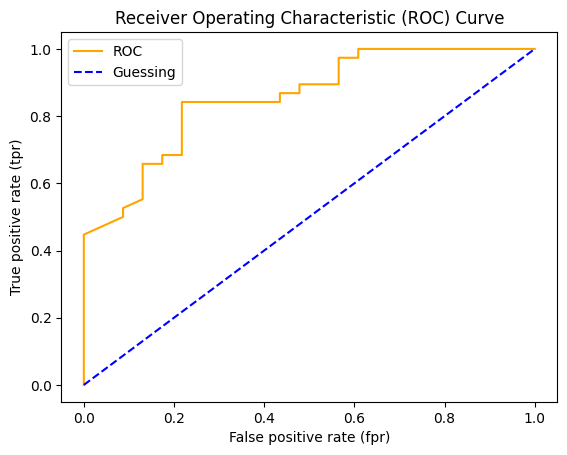

In [103]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and the true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], 'b--', label="Guessing")
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [104]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8552631578947368

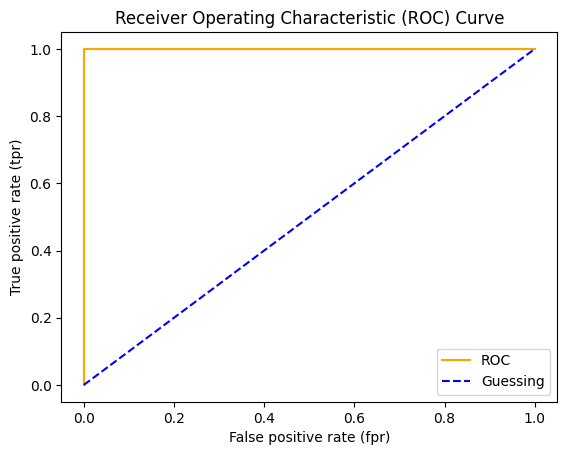

In [105]:
# PLot perfect ROC curve and AUC score
fpr, tpr, tresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [106]:
roc_auc_score(y_test, y_test)

1.0

### 4.2.1.3 Confusion Matrix

** A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
It essentialy gives you an idea of where the model is getting confused

In [107]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

conf = confusion_matrix(y_test, y_preds)

In [108]:
# Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted labels"])

Predicted labels,0,1
Actual Labels,,
0,18,5
1,7,31


In [109]:
# Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

In [110]:
sns.set(font_scale=1.5)

In [111]:
conf_mat = confusion_matrix(y_test, y_preds)

<Axes: >

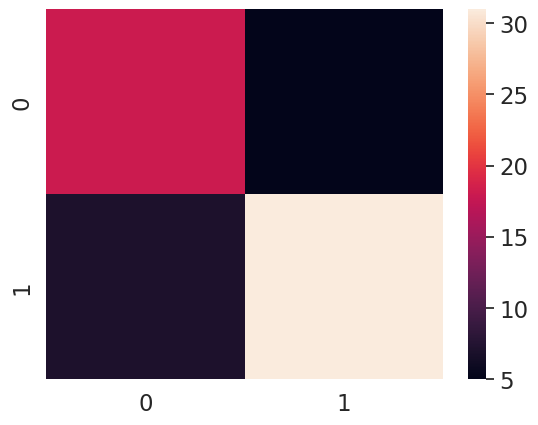

In [112]:
sns.heatmap(conf_mat)

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

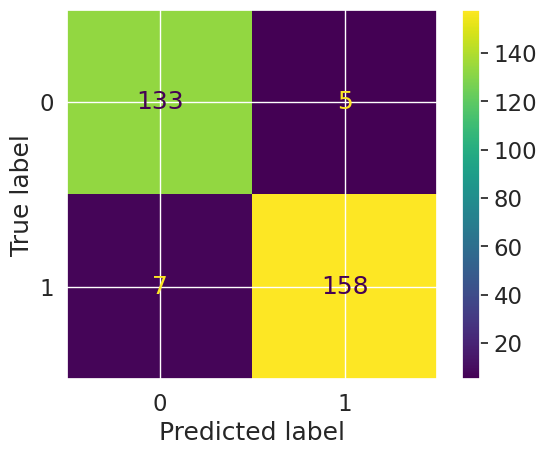

In [117]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

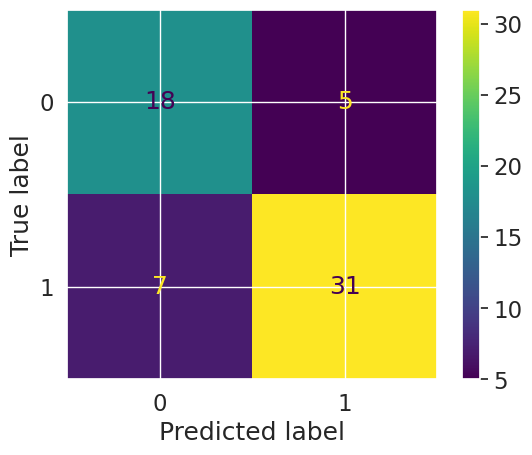

In [118]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

### 4.2.1.4 Classification report

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



## 4.2.2 Regression model evaluation metrics

We'll look at:

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [126]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df
y = housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [127]:
model.score(X_test, y_test)

0.8066196804802649

#### 4.2.2.1 R^2

In [128]:
from sklearn.metrics import r2_score
# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [129]:
r2_score(y_test, y_test_mean)

0.0

#### 4.2.2.2 MAE

MAE is the average of the absolute differences between predictions and actual values.
It gives you and idea of how wrong your models predictions are.

In [137]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [148]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["actual values"] - df["predicted values"]

In [149]:
df

,actual values,predicted values,differences
0,0.47700,0.493840,-0.016840
1,0.45800,0.754940,-0.296940
2,5.00001,4.928596,0.071414
3,2.18600,2.540290,-0.354290
4,2.78000,2.331760,0.448240
...,...,...,...
4123,2.63300,2.220380,0.412620
4124,2.66800,1.947760,0.720240
4125,5.00001,4.836378,0.163632
4126,0.72300,0.717820,0.005180


In [151]:
np.abs(df["differences"]).mean()

0.3265721842781009

### 4.2.2.3 MSE

MSE is the mean of the square of the actual and predicted values

In [153]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [154]:
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [160]:
data = pd.DataFrame(data={"Actual": y_test, "Predicted": y_preds})
data["diff"] = data["Actual"] - data["Predicted"]
data["diff squared"] = data["diff"] ** 2

In [161]:
(data["diff"] ** 2).mean()

0.2534073069137548

In [162]:
data

,Actual,Predicted,diff,diff squared
0,0.47700,0.493840,-0.016840,0.000284
1,0.45800,0.754940,-0.296940,0.088173
2,5.00001,4.928596,0.071414,0.005100
3,2.18600,2.540290,-0.354290,0.125521
4,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
4123,2.63300,2.220380,0.412620,0.170255
4124,2.66800,1.947760,0.720240,0.518746
4125,5.00001,4.836378,0.163632,0.026775
4126,0.72300,0.717820,0.005180,0.000027


## 4.2.3 USING THE SCORING PARAMETER

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [166]:
np.random.seed(42)
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, scoring=None)

In [167]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [169]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [182]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [183]:
# Precision
np.random.seed(42)
cv_precission = cross_val_score(clf, X, y, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precission)}%")

The cross-validated precision is: 0.8329547346025924%


In [184]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)}%")

The cross-validated recall is: 0.8545454545454545%


In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df
y = housing["target"]
model = RandomForestRegressor()

In [196]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
cv_r2
np.mean(cv_r2)

0.6545756342466266

In [199]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4843843314777132

In [200]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.45772938854774403

# 4.3 Problem-specific metric functions

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1: {f1_score(y_test, y_pred):.2f}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [216]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

Regression metrics on the test set
R2 score: 0.5106393318965518
MAE: 0.23754098360655734
MSE: 0.12204426229508197


# 5.  Improving model predictions through experimentation (hyperparameter tuning)

First model - baseline model.
You want to improve on the baseline model.

Two main methods
1. Improve data
    * collect more data (the more the better)
    * improve the quality of the data (dealing with missing values, encoding /turning things into numbers/

2. Improve model
    * use a better model
    * tinker with hyperparameters
    

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


**Creating an evaluation funciton**

In [70]:
def evaluate_predictions(y_true, y_preds):
    """Performs evaluation comparison on y_true labels and y_pred labels"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metrics_dict

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

np.random.seed(42)
heart_disease = shuffle(pd.read_csv("data/heart-disease.csv"))
heart_disease

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)


In [119]:
np.random.seed(42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [120]:
y_predictions = clf.predict(X_test)
BASELINE_METRICS = evaluate_predictions(y_test, y_predictions)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


## 5.1 Tuning Hyperparameters by hand

In [123]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=15)
clf_2.fit(X_train, y_train);

In [124]:
y_predictions_clf_2 = clf_2.predict(X_test)
HAND_TUNING_METRICS = evaluate_predictions(y_test, y_predictions_clf_2)

Acc: 77.05%
Precision: 0.85
Recall: 0.70
F1 score: 0.77


## 5.2 Tuning hyperparameters with RandomizedSearchCV

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

In [127]:
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            cv=5,
                            verbose=2)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [128]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20}

Calling `predict()` on `rs_clf` (our `RandomizedSearchCV`
                                 version of our classifier),
will now use the best hyperparameters it found.

In [129]:
y_predictions_rs = rs_clf.predict(X_test)
RS_METRICS = evaluate_predictions(y_test, y_predictions_rs)

Acc: 80.33%
Precision: 0.84
Recall: 0.79
F1 score: 0.81


## 5.3 Tuning hyperparameters with GridSearchCV

In [55]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [100, 1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 4]}

In [130]:
from sklearn.model_selection import GridSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)
gs_clf.fit(X_train, y_train);

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 1200, 1500, 2000]})

In [132]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [135]:
gs_y_predictions = gs_clf.predict(X_test)
GS_METRICS = evaluate_predictions(y_test, gs_y_predictions)

Acc: 81.97%
Precision: 0.84
Recall: 0.82
F1 score: 0.83


<Axes: >

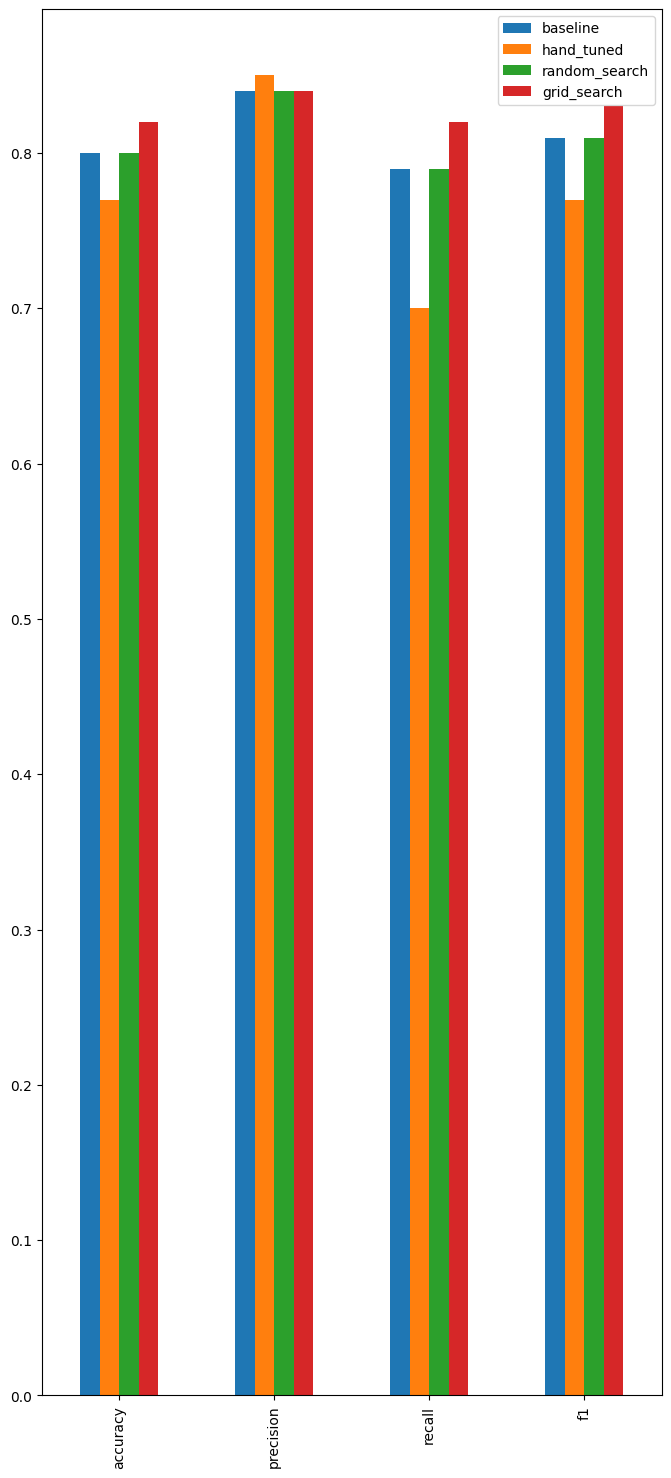

In [157]:
all_metrics_table = pd.DataFrame({"baseline": BASELINE_METRICS,
                                  "hand_tuned": HAND_TUNING_METRICS,
                                  "random_search": RS_METRICS,
                                  "grid_search": GS_METRICS,
                                 })
all_metrics_table.plot(kind="bar", figsize=(8, 18))
# BASELINE_METRICS

# 6. Saving and loading trained mahine learning models

Two ways to save and load models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [ ]:
import pickle

# Save an existing model to file
pickle.dump(OBJECT_WE_WANT_TO_SAV, opem("models/gs_random_forest_model_1.pkl", "wb"))


In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("models/gs_random_forest_model_1.pkl", "rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

**Joblib**

In [ ]:
from joblib import dump, load
# Save model to life
dump(OBJECT_WE_WANT_TO_SAV, filename="models/gs_random_forest_model_1.joblib")

In [ ]:
# Import a saved joblib model
loaded_job_model = load(filename="models/gs_random_forest_model_1.joblib")

In [ ]:
# Make and eval joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)